# Predicting Avocado Prices - Time Series Forecasting
## Context
It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

## Content
This data was downloaded from the Hass Avocado Board website. Here's how the Hass Avocado Board describes the data on their website:

- This data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set.
- Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military.
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

## Some relevant columns in the dataset:

- `Date` - The date of the observation
- `AveragePrice` - the average price of a single avocado
- `type` - conventional or organic
- `year` - the year
- `Region` - the city or region of the observation
- `Total Volume` - Total number of avocados sold
- `4046` - Total number of avocados with PLU 4046 sold
- `4225` - Total number of avocados with PLU 4225 sold
- `4770` - Total number of avocados with PLU 4770 sold

## Data Source
http://www.hassavocadoboard.com/retail/volume-and-price-data    

# 1. Import Libraries & Packages

In [1]:
# import EDA libraries & packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# import forcasting libraries
from fbprophet import Prophet

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# configurations
%matplotlib inline
sns.set_style('whitegrid')
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)

Importing plotly failed. Interactive plots will not work.


In [2]:
# load dataset
df = pd.read_csv('avocado.csv')

# 2. Explore dataset

In [3]:
# preview dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


- the dataset is not sorted by date

In [5]:
# shape of dataset
print("# rows : ", df.shape[0])
print("# cols : ", df.shape[1])

# rows :  18249
# cols :  14


In [6]:
# metadata - features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
# metadata - stats
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
# check for missing values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- there are no missing values in the dataset

In [9]:
# sort dataset by date
df = df.sort_values("Date")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


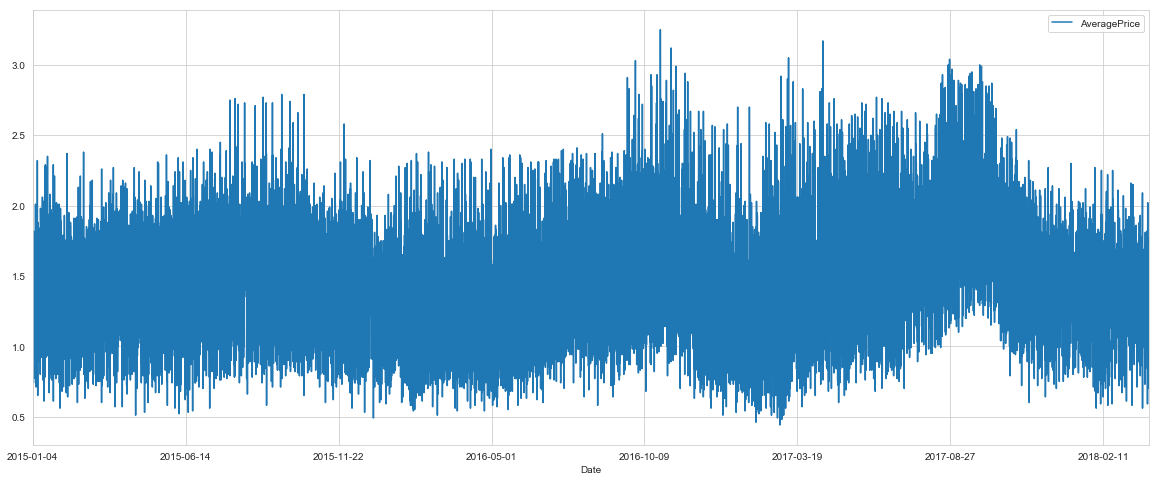

In [40]:
# plot the price feature
df.plot(x='Date', y='AveragePrice', figsize=(20,8))

- the prices are spread out massively with a lot of fluctuations

## Feature Exploration

### `region`

In [19]:
# check if the data is balanced for region
df['region'].value_counts()

Roanoke                338
LasVegas               338
Detroit                338
Syracuse               338
Boston                 338
Nashville              338
LosAngeles             338
Plains                 338
HarrisburgScranton     338
Northeast              338
Seattle                338
Columbus               338
DallasFtWorth          338
Philadelphia           338
Tampa                  338
NorthernNewEngland     338
NewYork                338
Sacramento             338
SanDiego               338
Indianapolis           338
Atlanta                338
TotalUS                338
Orlando                338
SanFrancisco           338
Charlotte              338
Albany                 338
Denver                 338
Jacksonville           338
GrandRapids            338
BaltimoreWashington    338
Spokane                338
California             338
RaleighGreensboro      338
StLouis                338
Portland               338
CincinnatiDayton       338
PhoenixTucson          338
H

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text xticklabel objects>)

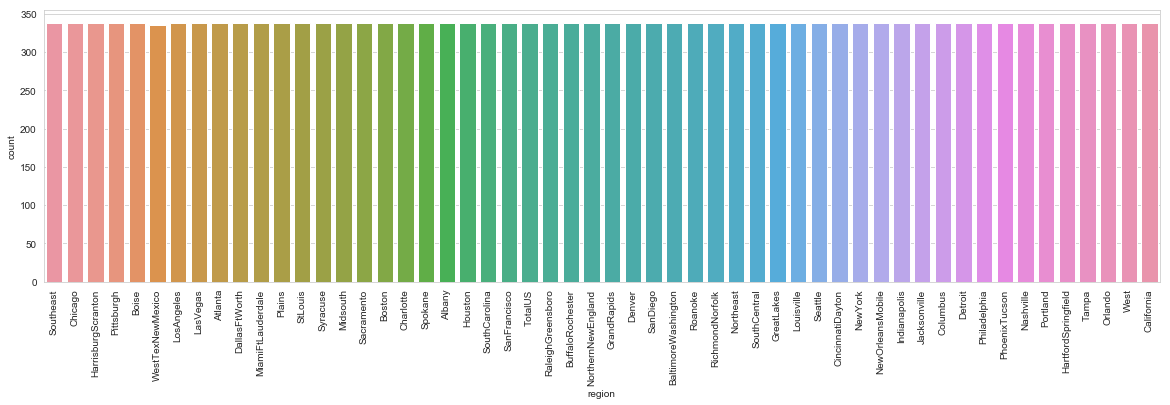

In [22]:
# countplot for regions
plt.figure(figsize=(20,5))
sns.countplot(x='region', data=df)
plt.xticks(rotation = 90)

- all regions have almost equal number of records
- `TotalUS` is a representation of overall sales across US market

### `year`

In [24]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

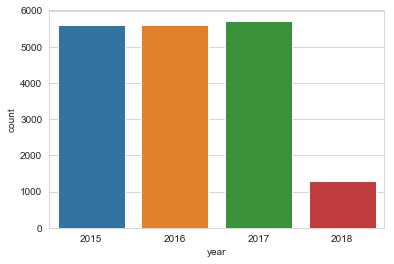

In [23]:
sns.countplot(x='year', data=df)

# 3. Modelling & Forecasting

## On complete data

In [25]:
# create a backup dataframe for time series forecasting
df1 = df.copy()

In [26]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton


In [27]:
# create a new dataframe
df = df[['Date', 'AveragePrice']]

# preview dataset
df.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [28]:
df.tail()

,Date,AveragePrice
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70
8814,2018-03-25,1.34


In [32]:
# prepare dataset for fbprophet
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [33]:
# preview dataset
df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 11569 to 8814
Data columns (total 2 columns):
ds    18249 non-null datetime64[ns]
y     18249 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 MB


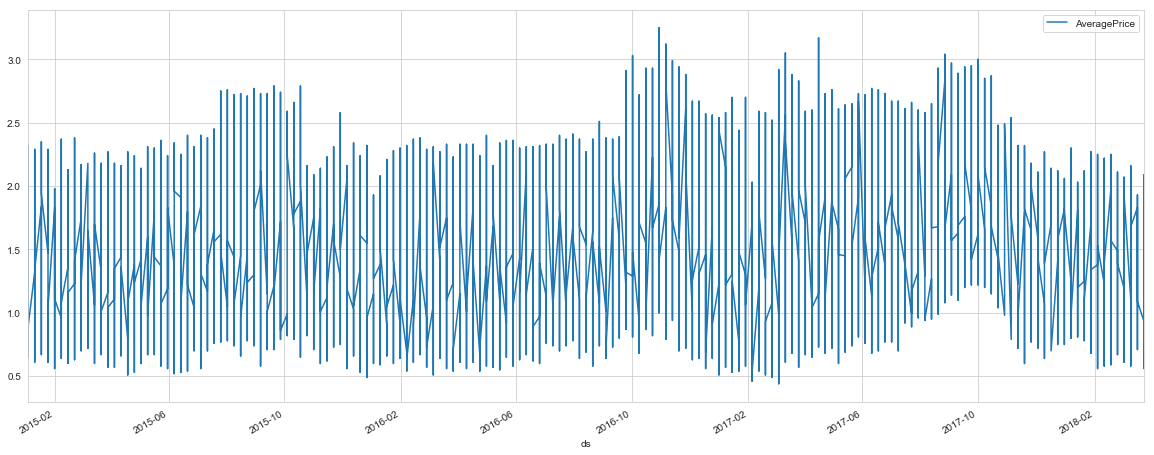

In [36]:
# plot the dataset
df.plot(x='ds',y='y',figsize=(20,8),label='AveragePrice')

In [37]:
# modelling with fbprophet
m = Prophet()
m.fit(df)  # fit the model

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
future = m.make_future_dataframe(periods=365)  # placeholder for forecasted values
forecast = m.predict(future)  # forecast the future

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498604,0.923944,1.904931,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
1,2015-01-04,1.498604,0.900621,1.900488,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
2,2015-01-04,1.498604,0.917041,1.862227,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
3,2015-01-04,1.498604,0.931635,1.860758,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
4,2015-01-04,1.498604,0.915352,1.846179,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.163836,0.564353,1.557396,0.981151,1.356861,-0.086298,-0.086298,-0.086298,-0.086298,-0.086298,-0.086298,0.0,0.0,0.0,1.077538
18610,2019-03-22,1.163109,0.551020,1.610213,0.979770,1.356426,-0.084617,-0.084617,-0.084617,-0.084617,-0.084617,-0.084617,0.0,0.0,0.0,1.078492
18611,2019-03-23,1.162382,0.577609,1.618777,0.978386,1.355702,-0.082661,-0.082661,-0.082661,-0.082661,-0.082661,-0.082661,0.0,0.0,0.0,1.079721
18612,2019-03-24,1.161655,0.555348,1.609979,0.976910,1.355036,-0.080451,-0.080451,-0.080451,-0.080451,-0.080451,-0.080451,0.0,0.0,0.0,1.081204


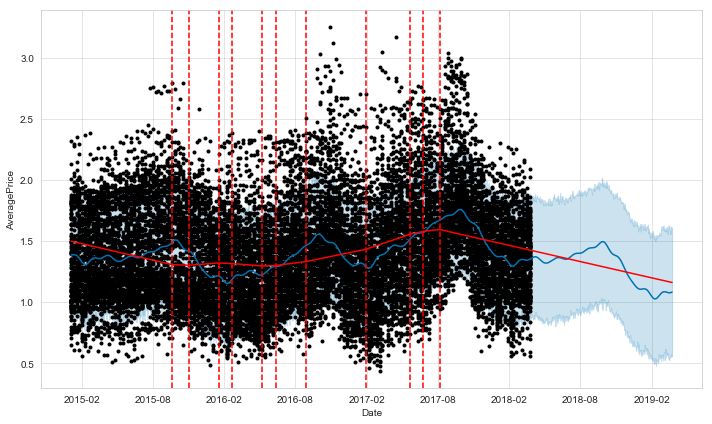

In [44]:
# plot the data with forecasted predictions
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast, xlabel='Date', ylabel='AveragePrice')
a = add_changepoints_to_plot(fig.gca(), m, forecast)

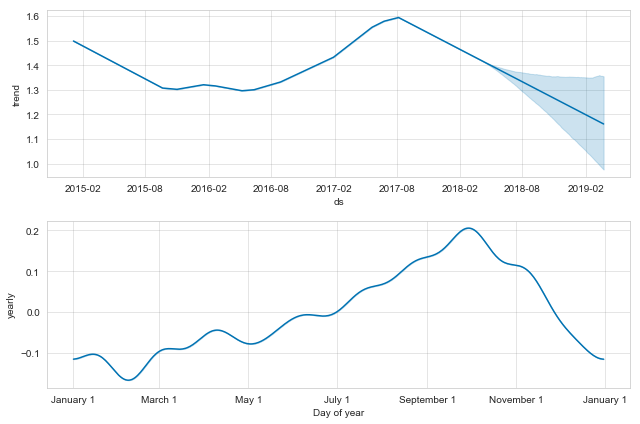

In [46]:
# decompose for seasonality and trend
fig = m.plot_components(forecast)

- Overall, there is a **downward trend** in `AveragePrice` predicted

# On region specific forecast

### `West`

In [48]:
# create a dataset for sales in 'West' region only
df_west = df1[df1['region']=='West']

In [49]:
df_west

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [51]:
# shape of dataset
print("# rows : ", df_west.shape[0])
print("# cols : ", df_west.shape[1])

# rows :  338
# cols :  14


In [55]:
# extract Date and AveragePrice from the dataset

# make a deep copy for backup
df_west_1 = df_west.copy()

# filter dataset from unwanted features
df_west = df_west[['Date', 'AveragePrice']]

# preview new dataset
df_west.head()

,Date,AveragePrice
11881,2015-01-04,1.40
2755,2015-01-04,0.89
11880,2015-01-11,1.39
2754,2015-01-11,0.95
2753,2015-01-18,0.96


In [78]:
# prepare dataset for fbprophet
df_west.columns = ['ds','y']
df_west['ds'] = pd.to_datetime(df_west['ds'])

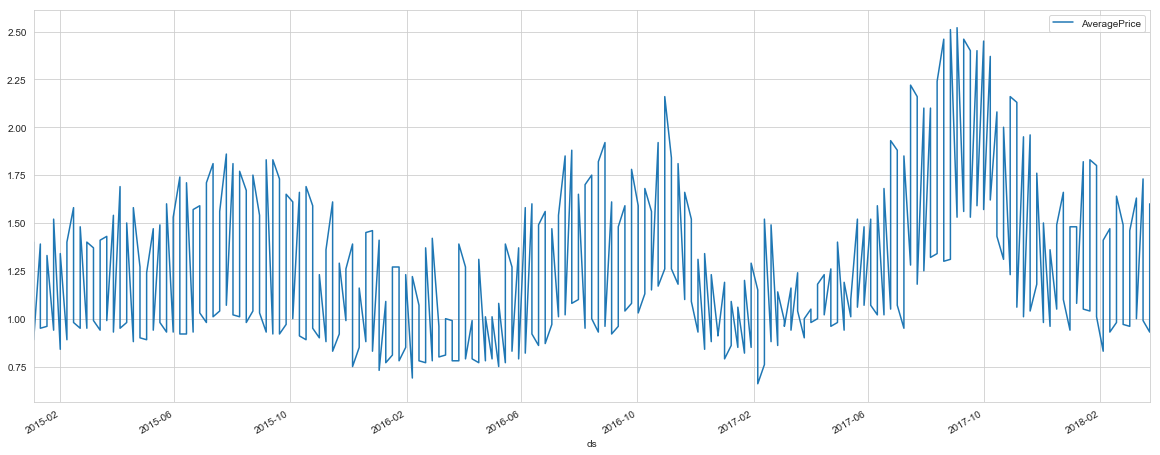

In [79]:
# plot dataset
df_west.plot(x='ds', y='y', figsize=(20,8), label='AveragePrice')

In [80]:
# modelling with prophet
m = Prophet()
m.fit(df_west)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


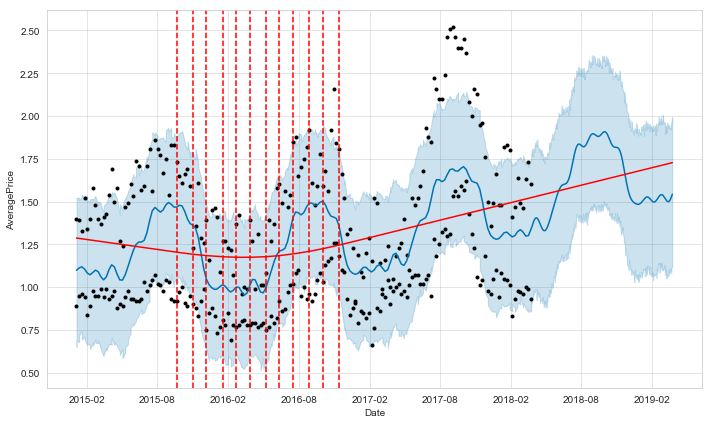

In [81]:
# plot the data with forecasted predictions
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast, xlabel='Date', ylabel='AveragePrice')
a = add_changepoints_to_plot(fig.gca(), m, forecast)

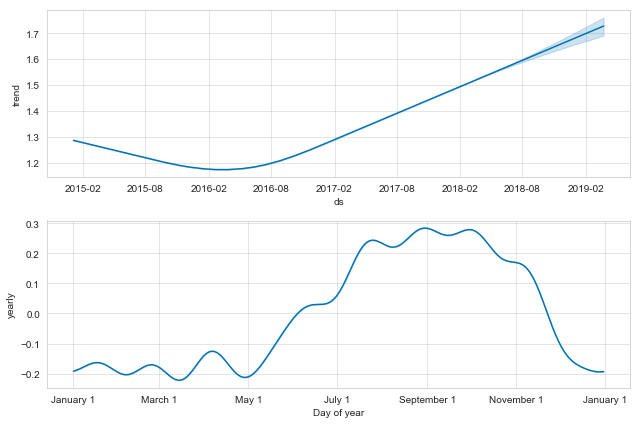

In [82]:
# decompose for seasonality and trend
fig = m.plot_components(forecast)

- In the west region, there is an **upward trend** in `AveragePrice` predicted

### `TotalUS`

In [65]:
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [67]:
# create a dataset for 'TotalUS' region
df_total_US = df1[df1['region']=='TotalUS']

In [69]:
# preview dataset
df_total_US.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2703,51,2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS
11829,51,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
11828,50,2015-01-11,1.42,669528.88,270966.74,260971.60,3830.42,133760.12,106844.49,26915.63,0.00,organic,2015,TotalUS
2702,50,2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS
11827,49,2015-01-18,1.42,713120.00,254319.58,311811.01,4020.85,142968.56,101850.23,41118.33,0.00,organic,2015,TotalUS


In [70]:
df_total_US.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9092,2,2018-03-11,1.09,40449603.12,14089091.05,10758039.45,707578.82,14894893.80,11392828.89,3229556.62,272508.29,conventional,2018,TotalUS
18214,1,2018-03-18,1.54,1675804.22,170801.85,444949.69,1045.38,1058651.50,837351.85,221129.46,170.19,organic,2018,TotalUS
9091,1,2018-03-18,1.05,41386314.12,13707389.51,11061051.69,645380.85,15972492.07,11712807.19,3988101.74,271583.14,conventional,2018,TotalUS
18213,0,2018-03-25,1.55,1559967.20,121007.94,342853.10,1070.24,1093861.09,902774.79,190941.84,144.46,organic,2018,TotalUS
9090,0,2018-03-25,1.03,43409835.75,14130799.10,12125711.42,758801.12,16394524.11,12540327.19,3544729.39,309467.53,conventional,2018,TotalUS


In [71]:
# shape of dataset
print("# rows : ", df_total_US.shape[0])
print("# cols : ", df_total_US.shape[1])

# rows :  338
# cols :  14


In [72]:
# prepare dataset for modelling with prophet

In [73]:
# filter dataset of unwanted features

# create deep copy for backup
df_total_US_1 = df_total_US.copy()

# remove features
df_total_US = df_total_US_1[['Date','AveragePrice']]

In [85]:
# prepare dataset for fbprophet
df_total_US.columns = ['ds','y']
df_total_US['ds'] = pd.to_datetime(df_total_US['ds'])

In [87]:
# preview dataset
df_total_US.head()

,ds,y
2703,2015-01-04,0.95
11829,2015-01-04,1.46
11828,2015-01-11,1.42
2702,2015-01-11,1.01
11827,2015-01-18,1.42


In [86]:
# metadata
df_total_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 2703 to 9090
Data columns (total 2 columns):
ds    338 non-null datetime64[ns]
y     338 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB


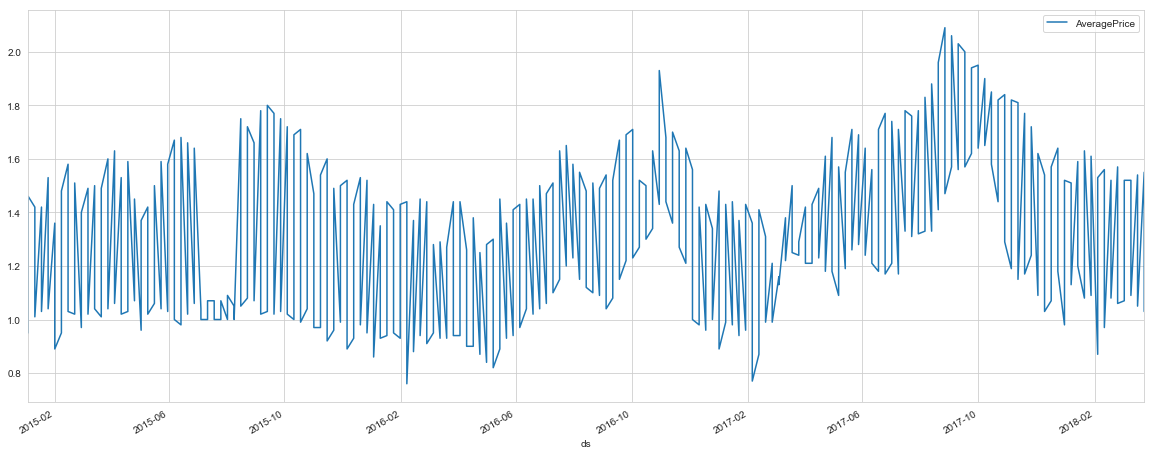

In [88]:
# plot dataset
df_total_US.plot(x='ds', y='y', figsize=(20,8), label='AveragePrice')

In [89]:
# modelling with prophet
m = Prophet()
m.fit(df_total_US)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


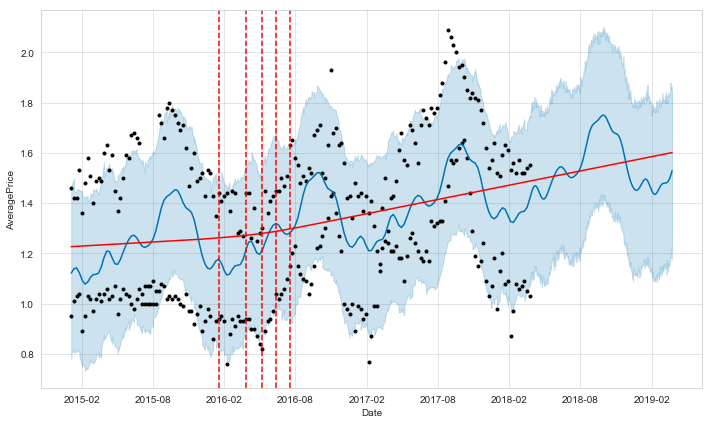

In [90]:
# plot data with forecast
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast, xlabel='Date', ylabel='AveragePrice')
a = add_changepoints_to_plot(fig.gca(), m, forecast)

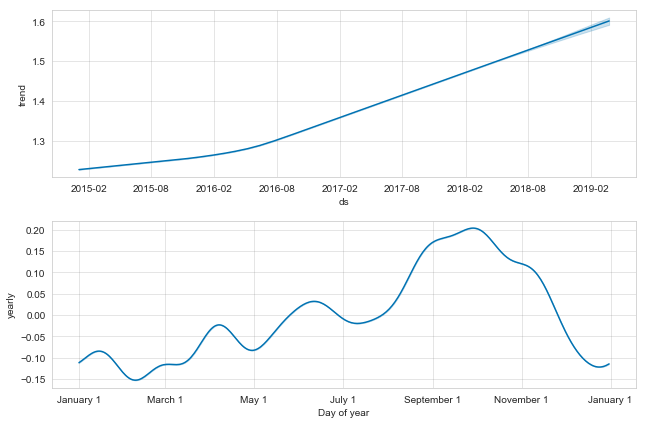

In [93]:
# decompose forecast
m.plot_components(forecast);

- there is a general **upward trend** for `AveragePrice` of avacodos in the `TotalUS` region